In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('Cancer.csv')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# shape of the dataset
print(data.shape)

(569, 33)


In [4]:
# checking missing values
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Display data types and basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# summary statistics
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [7]:
data.drop(columns=['Unnamed: 32','id'], inplace=True)  # Drop the empty column
data.drop_duplicates(inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

## Correlation

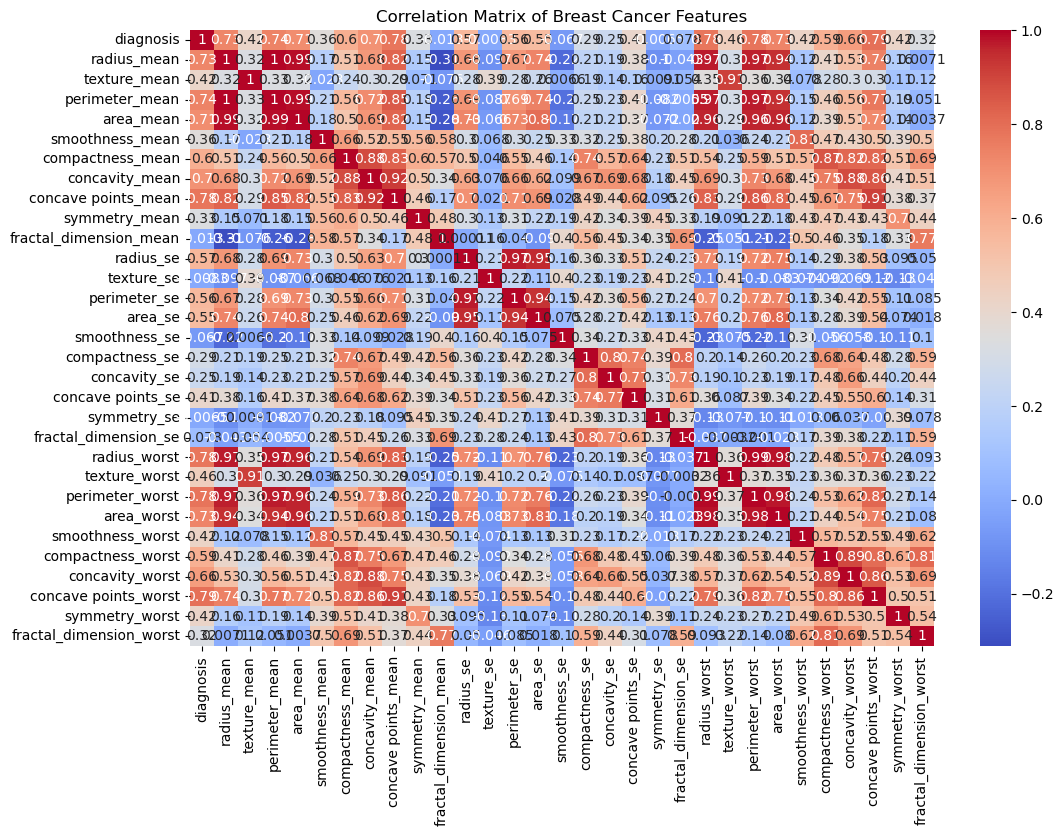

In [8]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Breast Cancer Features')
plt.show()

## Univariate Analysis

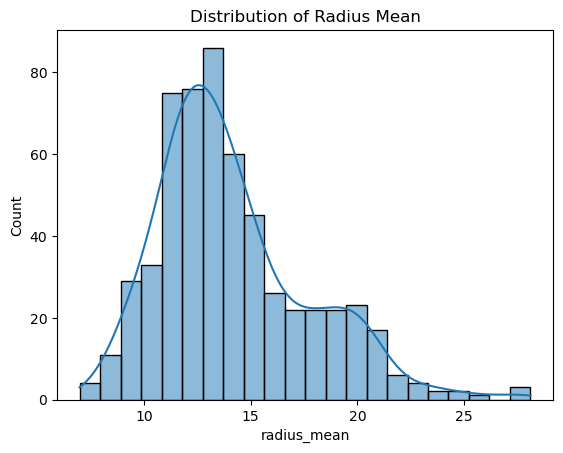

In [9]:
# Distribution of Radius Mean (key variable)
sns.histplot(data['radius_mean'], kde=True)
plt.title('Distribution of Radius Mean')
plt.show()

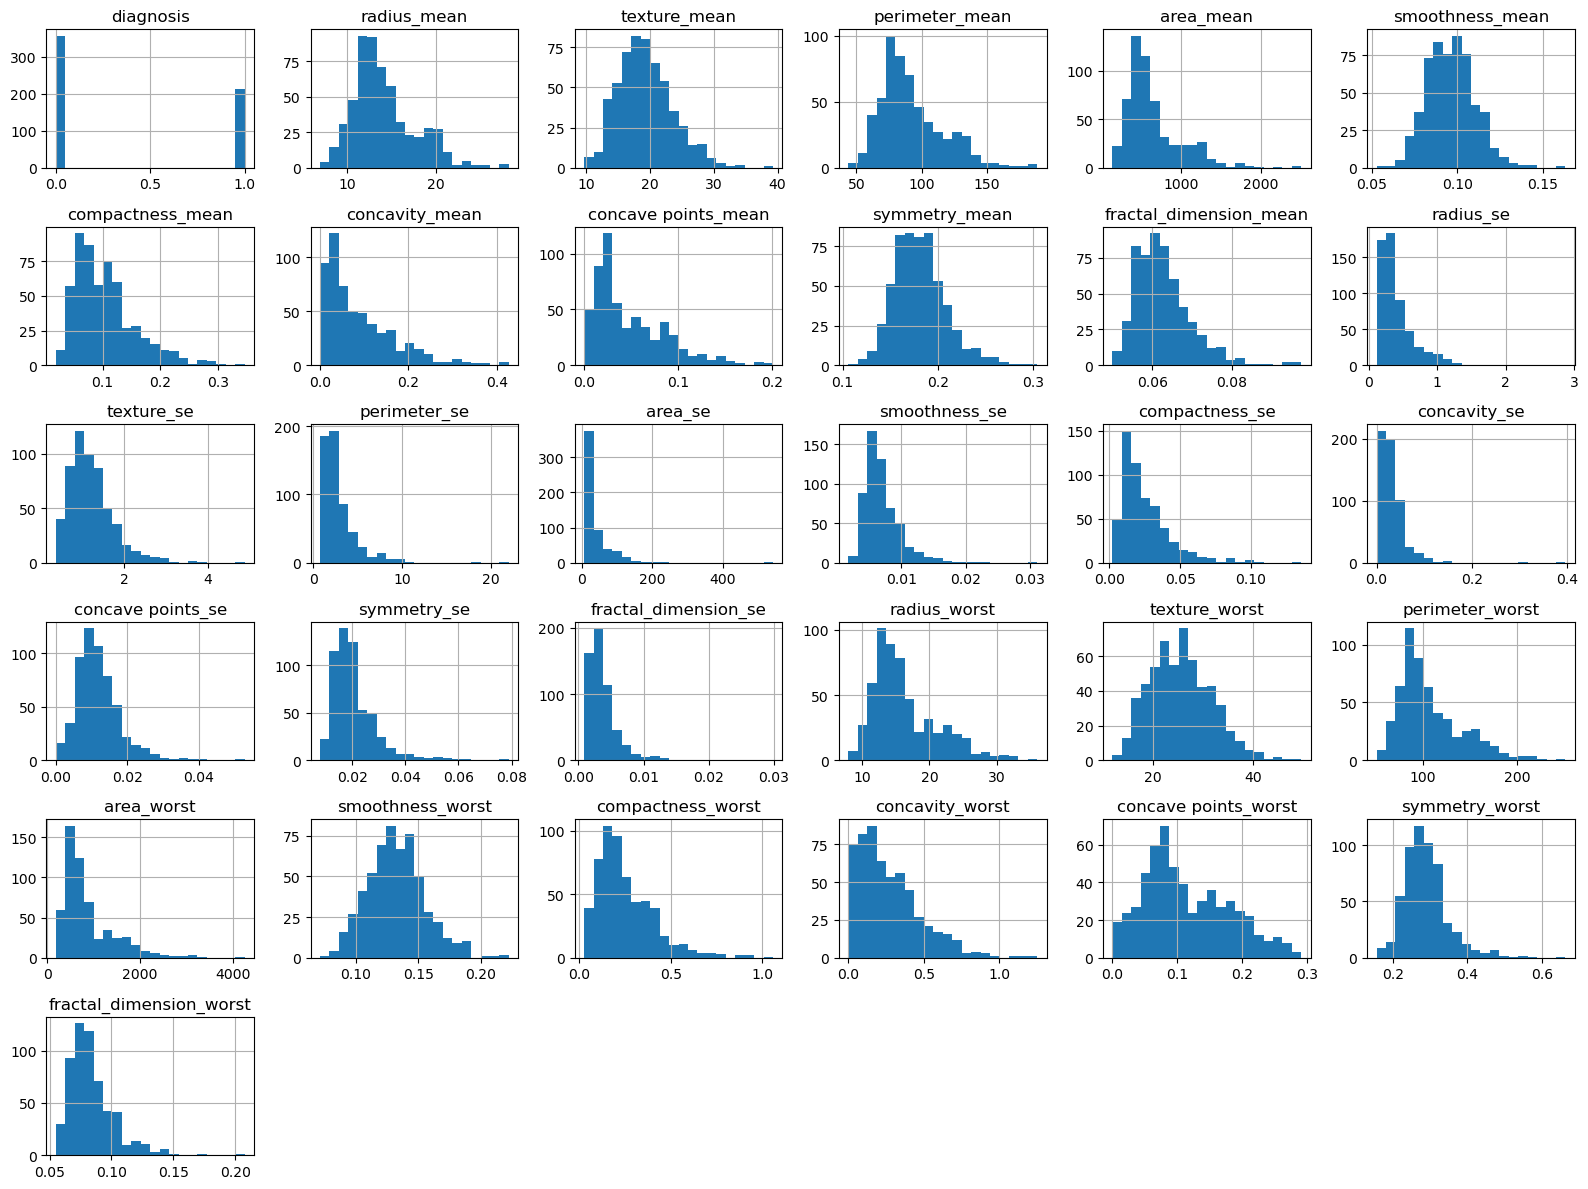

In [10]:
# Histogram for numeric features
data.hist(figsize=(16, 12), bins=20)
plt.tight_layout()
plt.show()

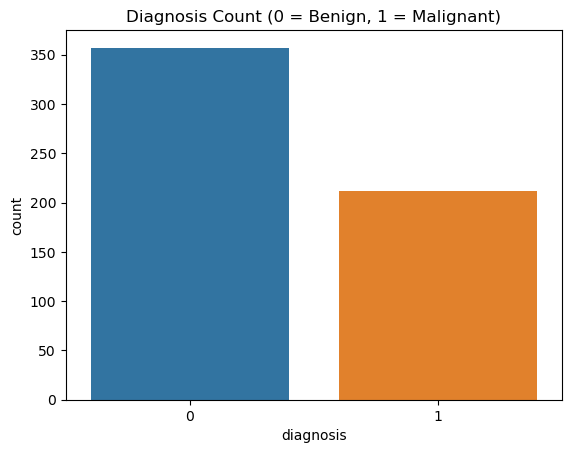

In [11]:
# Diagnosis count
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Count (0 = Benign, 1 = Malignant)')
plt.show()

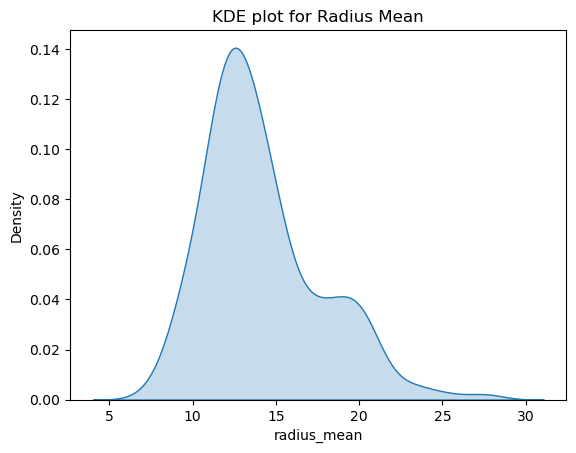

In [12]:
# Kernel Density Estimation (KDE)plot for the radius_mean
sns.kdeplot(data['radius_mean'], shade=True)
plt.title('KDE plot for Radius Mean')
plt.show()

## Bivariate Analysis

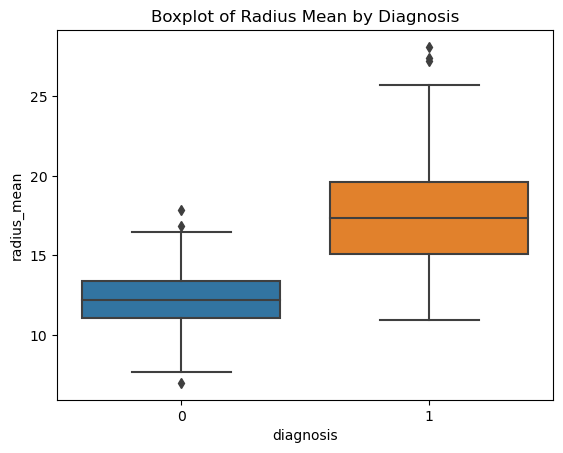

In [13]:
# Box plot of radius_mean by Diagnosis
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()

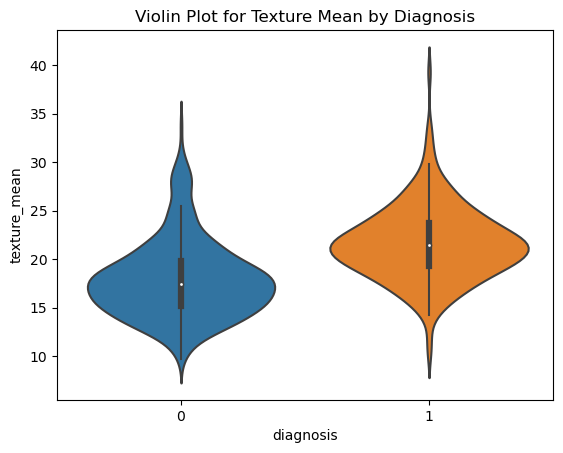

In [14]:
# Violin plot for texture_mean by diagnosis
sns.violinplot(x='diagnosis', y='texture_mean', data=data)
plt.title('Violin Plot for Texture Mean by Diagnosis')
plt.show()

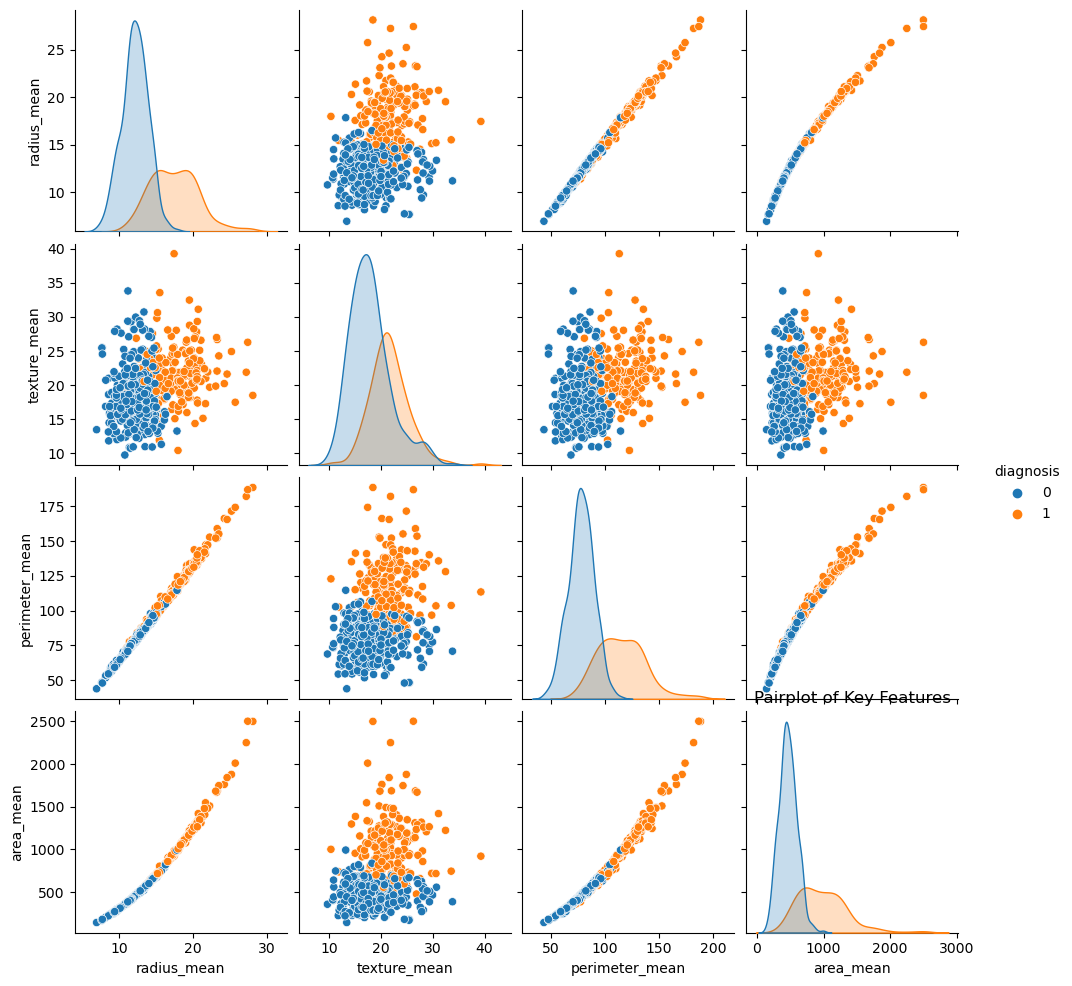

In [15]:
# Pairplot for multiple features
sns.pairplot(data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis')
plt.title('Pairplot of Key Features')
plt.show()

## Multivariate Analysis

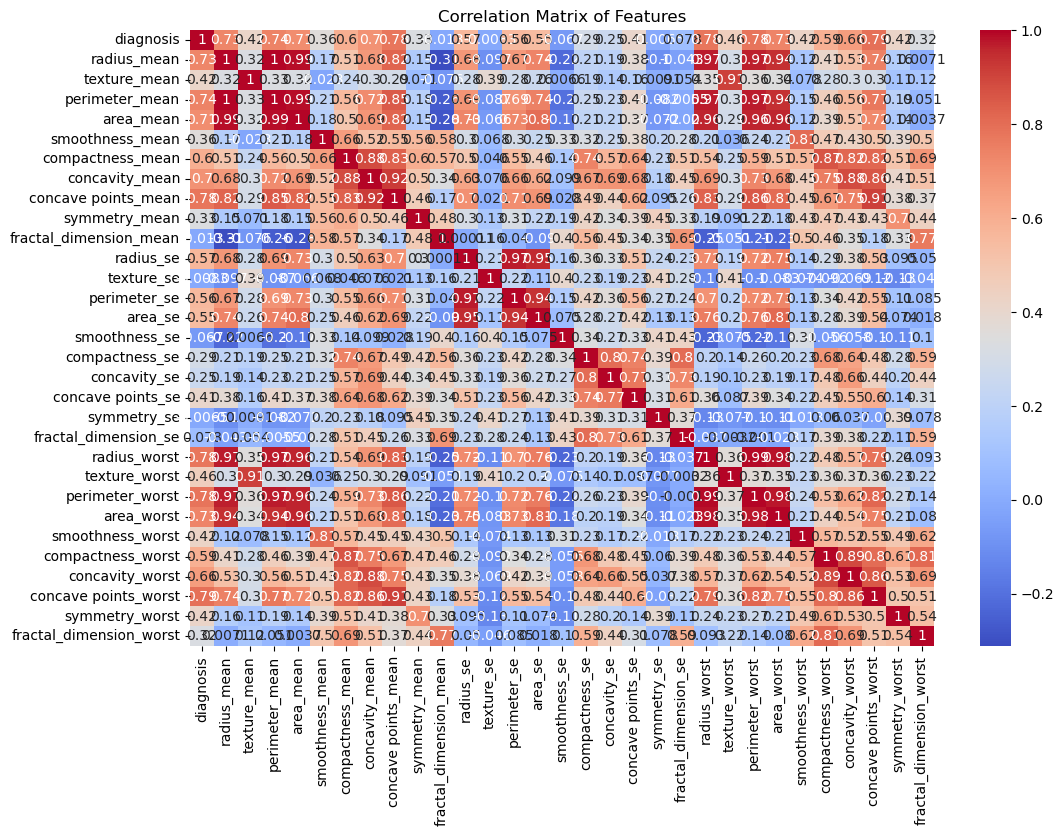

In [16]:
# Correlation matrix and heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

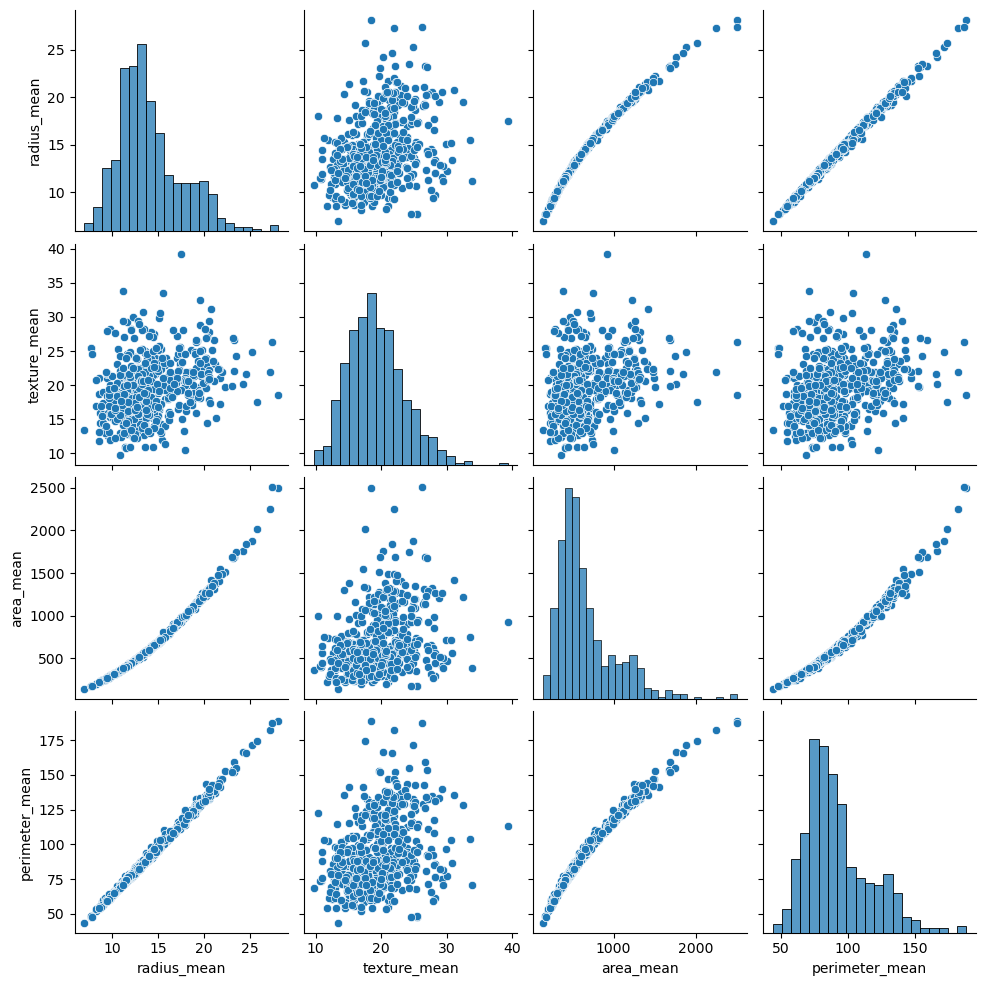

In [17]:
# Scatterplot for multiple features
sns.pairplot(data[['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean']], kind='scatter')
plt.show()

In [18]:
# Correlation of features with the diagnosis
correlation_with_diagnosis = data.corr()['diagnosis'].sort_values(ascending=False)
print(correlation_with_diagnosis)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

## Outliers Detection

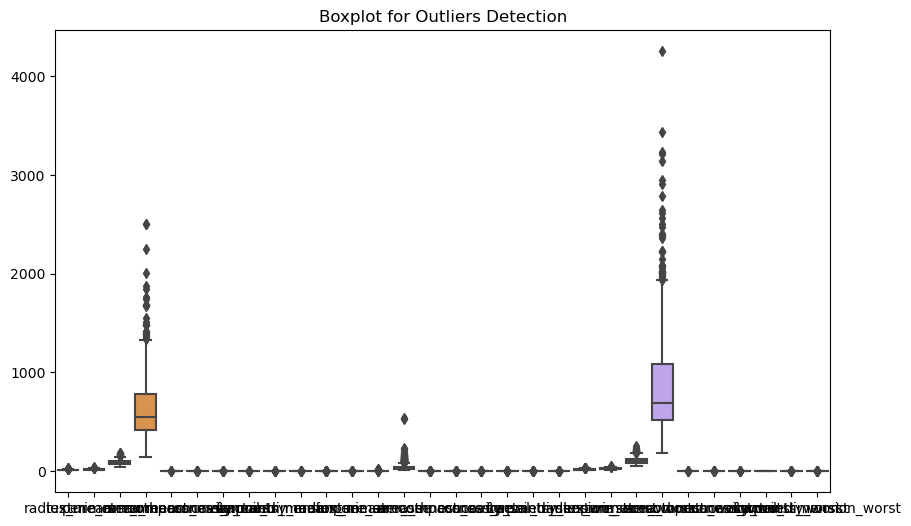

In [19]:
# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop('diagnosis', axis=1))
plt.title('Boxplot for Outliers Detection')
plt.show()

In [20]:
from scipy import stats

# Z-score to detect outliers
z_scores = np.abs(stats.zscore(data.drop('diagnosis', axis=1)))
print(np.where(z_scores > 3))

(array([  0,   3,   3,   3,   3,   3,   3,   3,   3,   9,   9,   9,  12,
        12,  12,  12,  12,  14,  14,  23,  25,  31,  31,  35,  42,  42,
        42,  60,  68,  68,  68,  68,  71,  71,  71,  71,  72,  78,  78,
        78,  78,  78,  82,  82,  82,  82,  82,  82,  82,  83, 105, 105,
       108, 108, 108, 108, 108, 108, 112, 112, 116, 119, 119, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
       138, 138, 146, 146, 146, 151, 151, 152, 152, 152, 152, 152, 152,
       176, 176, 180, 180, 180, 180, 180, 180, 180, 181, 181, 190, 190,
       190, 190, 190, 192, 202, 203, 212, 212, 212, 212, 212, 212, 212,
       213, 213, 213, 213, 213, 219, 219, 232, 236, 236, 239, 239, 258,
       258, 258, 259, 259, 265, 265, 265, 265, 265, 288, 288, 290, 290,
       314, 314, 318, 323, 339, 339, 345, 351, 352, 352, 352, 352, 352,
       352, 352, 352, 368, 368, 370, 376, 376, 376, 379, 379, 379, 388,
       389, 400, 416, 417, 417, 430, 461, 461, 461, 461, 461, 4

## Dimensionality Reduction using PCA (Principal Component Analysis) 

Explained variance by 2 components: 0.6324320765155949


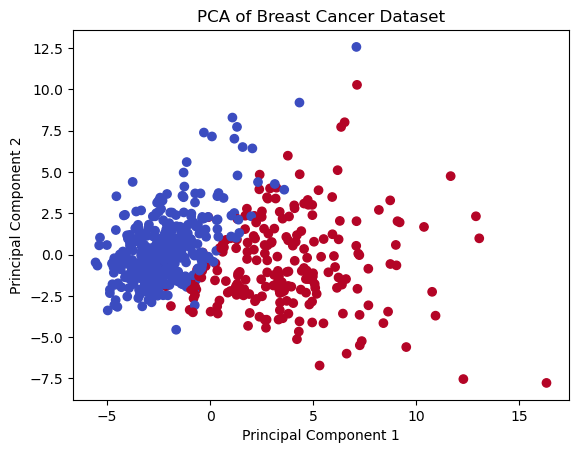

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('diagnosis', axis=1))

# PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
print(f'Explained variance by 2 components: {pca.explained_variance_ratio_.sum()}')

# Plot the PCA result
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['diagnosis'], cmap='coolwarm')
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Feature Engineering

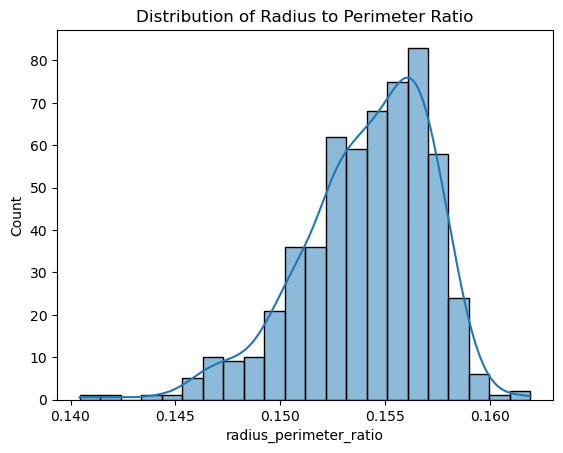

In [22]:
# A new feature ratio of radius_mean to perimeter_mean
data['radius_perimeter_ratio'] = data['radius_mean'] / data['perimeter_mean']

# Checking the distribution of the new feature
sns.histplot(data['radius_perimeter_ratio'], kde=True)
plt.title('Distribution of Radius to Perimeter Ratio')
plt.show()